In [75]:
import cv2, glob, sys, os
import numpy as np
import pandas as pd
import numpy.random as rd
import scipy as sp
from scipy import stats as st
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
#sns.set(style="whitegrid", palette="muted", color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams["patch.force_edgecolor"] = True
import sys
import os

# OS判別 ======================
flag_win32 = False
try:
    os.uname()
except AttributeError:
    flag_win32 = True

# Mac用フォント設定
if not flag_win32:
    from matplotlib import font_manager
    font_path = '/Library/Fonts/Osaka.ttf'
    font_prop = font_manager.FontProperties(fname=font_path)
    matplotlib.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['font.family'] = 'Osaka'

In [76]:
# 一様乱数の分散
b = 1
a = 0
m = ((b-a)**2)/12
m

0.08333333333333333

In [77]:
rd.seed = 71
n_sample = 500
n_trial  = 10000
X = np.zeros((n_trial, n_sample))
mean = np.zeros(n_trial)
var  = np.zeros(n_trial)

for i in range(n_trial):
    # 0-1の間の一様乱数。(平均0.5, 分散0.083)
    X[i] = st.uniform.rvs(size=n_sample)
    mean[i] = np.mean(X[i])
    var[i]  = np.var(X[i])

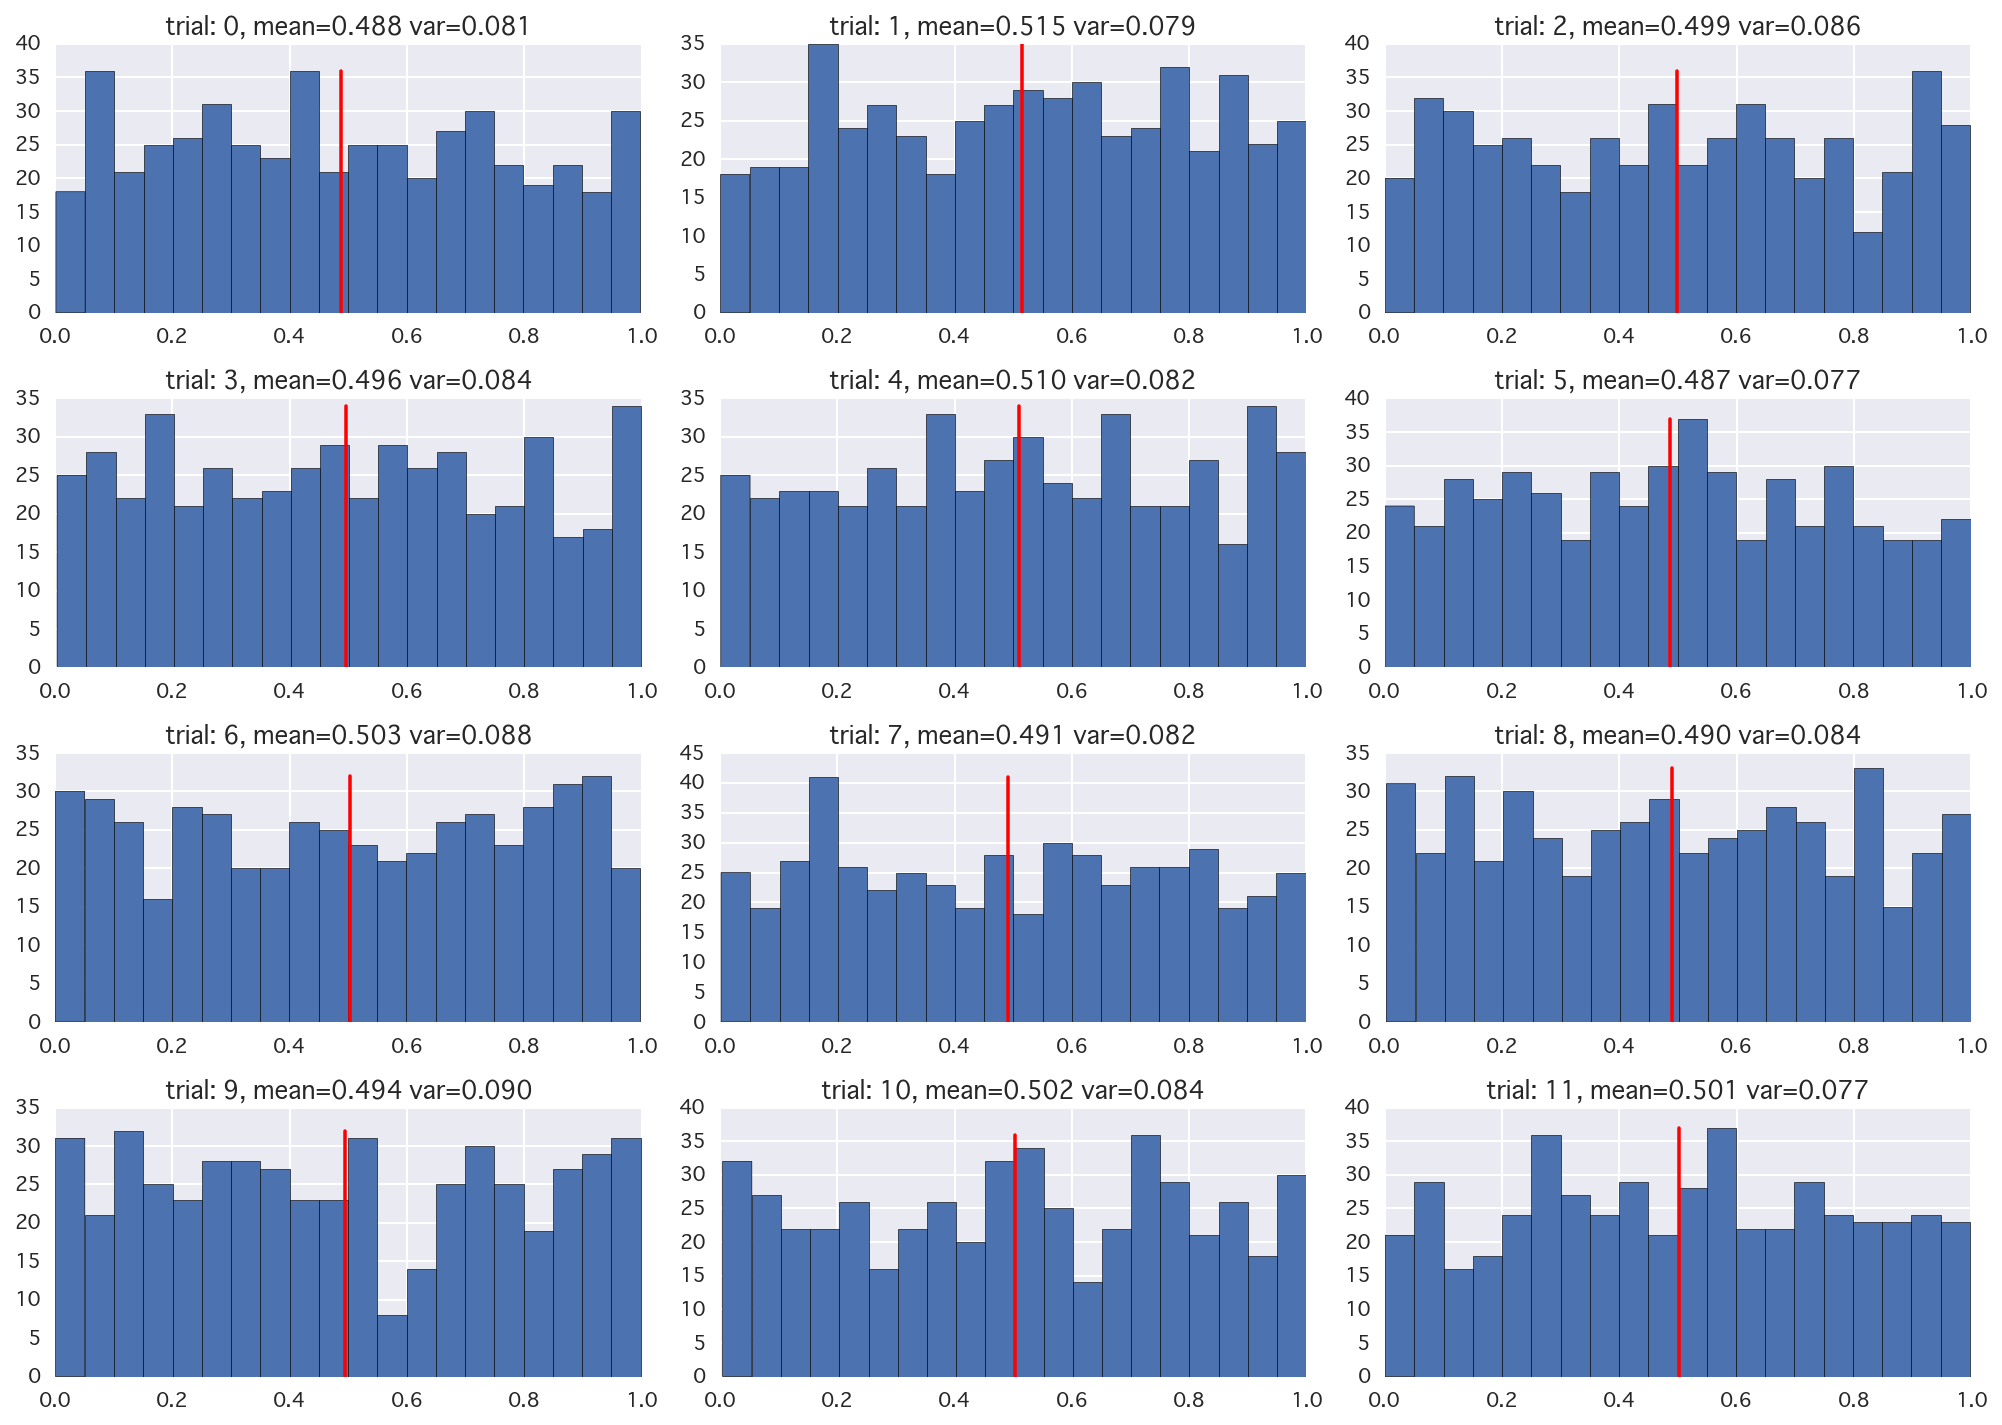

In [78]:
# 12個を可視化
plt.figure(figsize=(14,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    cnt, hist_range, _ = plt.hist(X[i], bins=20)
    plt.plot([mean[i], mean[i]],[0, np.max(cnt)], "r")
    plt.title("trial: {0}, mean={1:0.3f} var={2:0.3f}".format(i, mean[i], var[i]))
plt.tight_layout()

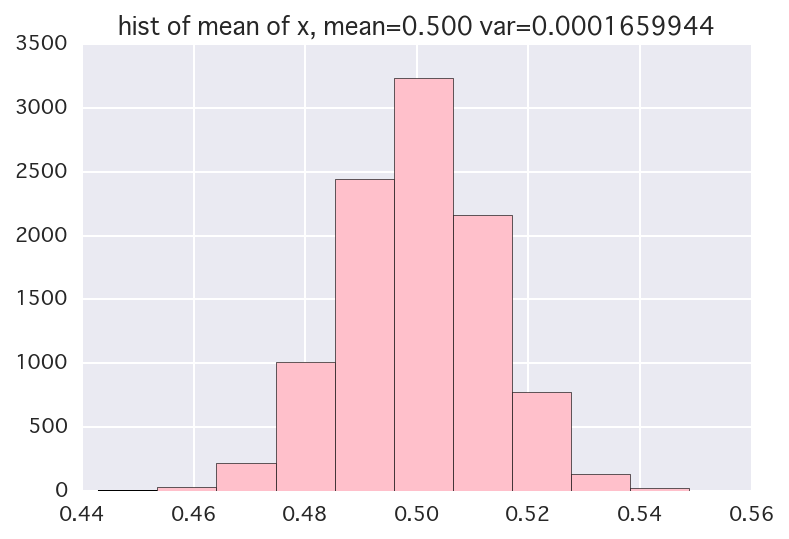

In [79]:
plt.hist(mean, color="pink")
plt.title("hist of mean of x, mean={0:0.3f} var={1:0.10f}".format(np.mean(mean), np.var(mean)))
plt.show()

In [80]:
# Var[\bar{x}] = \sigma^2 / n
0.083 / n_sample

0.000166

## サンプル数増加に伴う$Var[\bar{x}]$の減少

In [98]:

n_samples  = [10, 50, 100, 1000, 5000, 10000]
n_trial = 10000
mean_list = []
var_list  = []
for i, n_sp in enumerate(n_samples):
    # 0-1の間の一様乱数。(平均0.5, 分散0.083)
    X = st.uniform.rvs(size=(n_trial, n_sp))
    mean_list.append(np.mean(X, axis=1))
    var_list.append(np.var(X, axis=1))

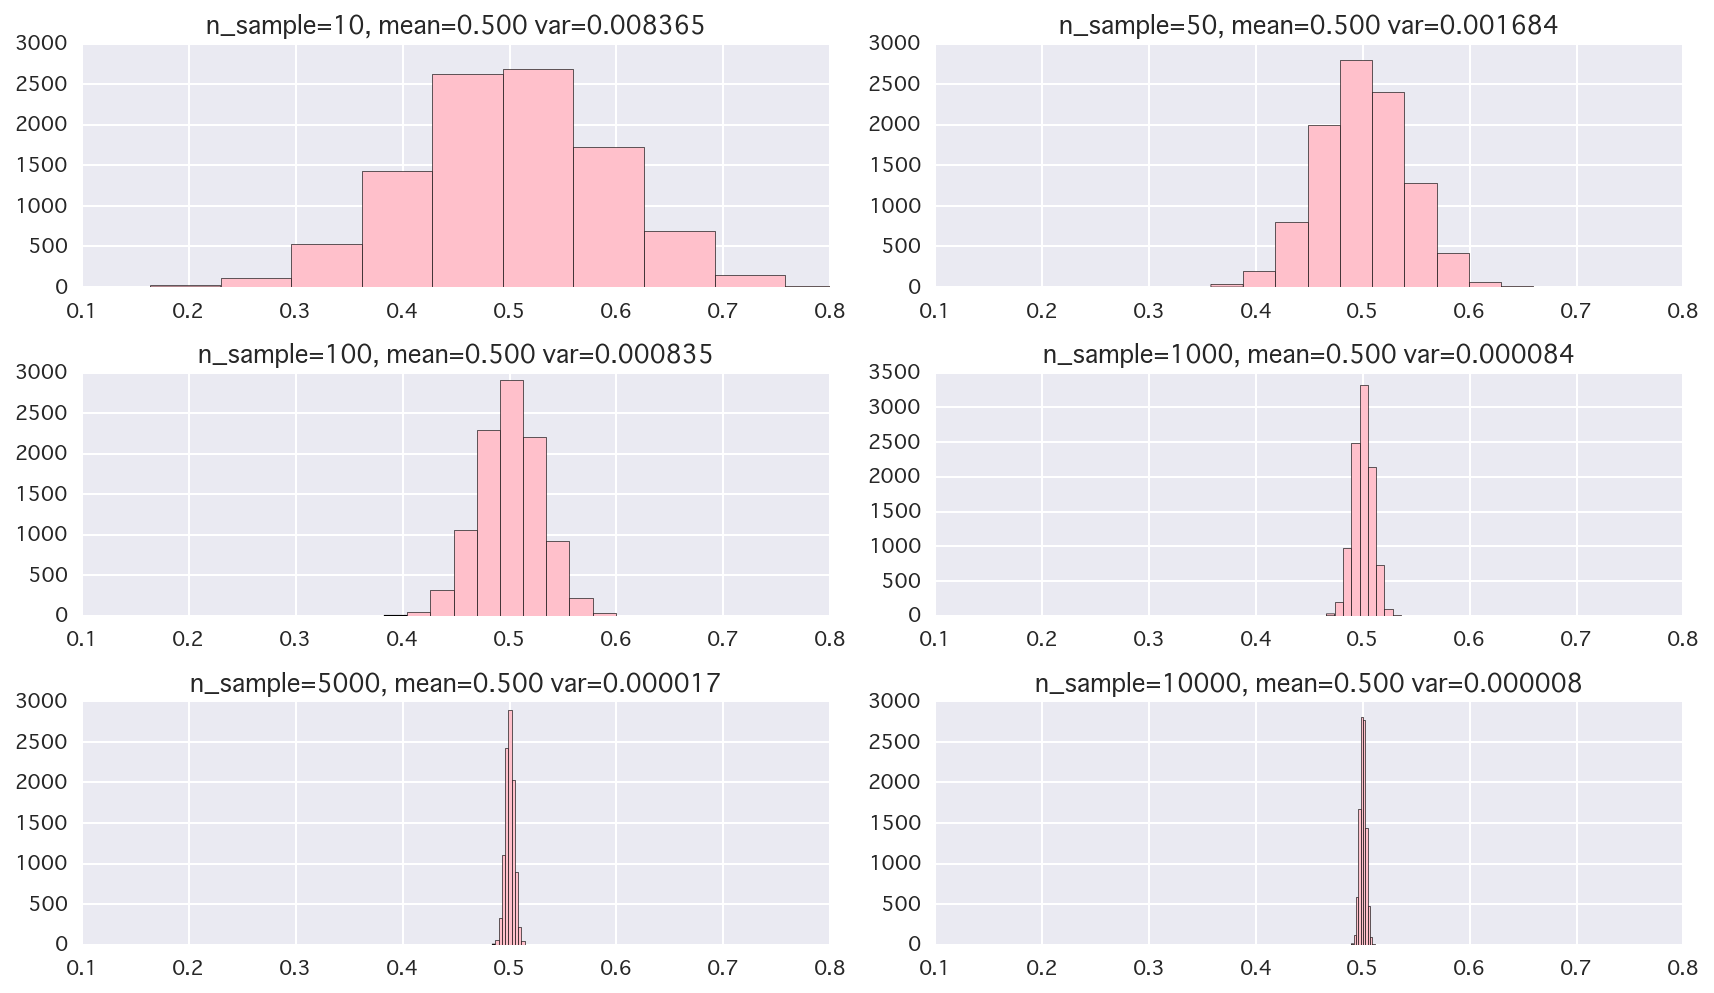

In [104]:
plt.figure(figsize=(12,7))
for i, n in enumerate(n_samples):
    plt.subplot(3,2,i+1)
    plt.hist(mean_list[i], color="pink")
    plt.title("n_sample={0}, mean={1:0.3f} var={2:0.6f}".format(n, np.mean(mean_list[i]), np.var(mean_list[i])))
    plt.xlim(0.1,0.8)
plt.tight_layout()
plt.show() 